In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open(f"real_performance_full_50_generated_train_graphs_30_seeds.pickle",'rb') as f:
    data = pickle.load(f)

10000_size
10


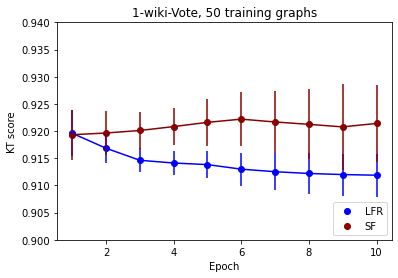

100000_size
10


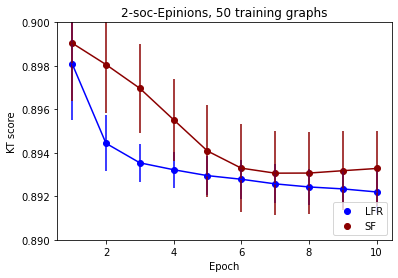

300000_size
10


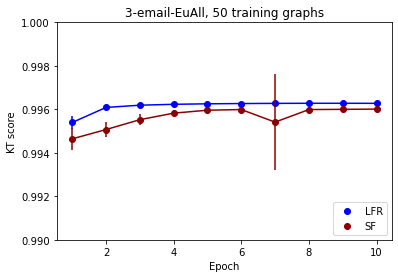

<Figure size 432x288 with 0 Axes>

In [3]:
seeds = range(15)
epochs = range(10)

for graph in ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']:
    size = list(data[graph]['LFR'].keys())[0]
    print(size)
    lfr = data[graph]['LFR'][f'{size}']
    sf = data[graph]['SF'][f'{size}']

    xs = [j for  j in range(1,11)]
    erlfr=[]
    xlfr = []
    ersf = []
    xsf = []
    for epoch in epochs:
        aux_lfr = []
        aux_sf = []
        
        for seed in seeds:
            aux_lfr.append(lfr['1_copies']['pred'][f'{epoch}_epoch'][f'{seed}_seed']['kt'])
            aux_sf.append(sf['1_copies']['pred'][f'{epoch}_epoch'][f'{seed}_seed']['kt'])

        xlfr.append(np.mean(np.array(aux_lfr)))
        erlfr.append(np.std(np.array(aux_lfr)))
        xsf.append(np.mean(np.array(aux_sf)))
        ersf.append(np.std(np.array(aux_sf)))
    print(len(xlfr))
    plt.errorbar(xs,xlfr,erlfr,c='b')
    plt.scatter(xs,xlfr,c='b',label= "LFR")


    plt.errorbar(xs,xsf,ersf,c='darkred')
    plt.scatter(xs,xsf,c='darkred',label = "SF")


    plt.title(f"{graph}, 50 training graphs")
    plt.ylabel("KT score")
    plt.xlabel("Epoch")
    if graph[:1] == '1':
        plt.ylim(0.9,0.94)
    elif graph[:1] == '2':
        plt.ylim(0.89,0.9)
    else:
        plt.ylim(0.99,1)
    #plt.ylim(0.89,1)
    plt.legend(loc=4)
    plt.show()
    plt.clf()
    

In [4]:
import pickle
from scipy.stats import kendalltau,pearsonr

def metrics(pred_results,real_results, graph, positions=[]):

    n = len(pred_results)
    print(f"Number of nodes: {n}")
    assert n == len(real_results)

    nodes_sorted_pred = sorted(range(n),reverse=True,key=lambda k: pred_results[k])
    nodes_sorted_real = sorted(range(n),reverse=True,key=lambda k: real_results[k])
    
    m_dict = {'equal':{},'in_top':{},'pearson':{},'kendall':{}}
    
    if positions == []:
        if graph == '3-email-EuAll':
            percentages = range(1,11)
        else:
            percentages = range(1,101)
        values = []
        for p in percentages:
            values.append(int(p*n/100))
            for k in m_dict.keys():
                m_dict[k][p] = []
    
    else:

        values = positions
        for p in positions:
            for k in m_dict.keys():
                m_dict[k][p] = []

    m_dict['fullkendall'] = kendalltau(pred_results,real_results)

    # nodos igual posicion top
    for idx, p in enumerate(values):
        print(f"Coincident: {idx}",end='\r')
        c = 0
        for j in range(p):
            if nodes_sorted_pred[j] == nodes_sorted_real[j]:
                c += 1
        if len(positions) == 0:
            m_dict['equal'][percentages[idx]].append(round(c/p*100,4))
        else:
            m_dict['equal'][p].append(round(c/p*100,4))
    print("")

    # nodos acertados top
    for idx, p in enumerate(values):
        print(f"In top: {idx}",end='\r')
        a = sum(1 for item in nodes_sorted_pred[:p] if item in nodes_sorted_real[:p])
        if len(positions) == 0:
            m_dict['in_top'][percentages[idx]].append(round(a/p*100,4))
        else:
            m_dict['in_top'][p].append(round(a/p*100,4))
    print("")
    
    # Pearson correlation
    for idx, p in enumerate(values):
        print(f"Pearson: {idx}",end='\r')
        pear = pearsonr(nodes_sorted_pred[:p],nodes_sorted_real[:p])
        if len(positions) == 0:
            m_dict['pearson'][percentages[idx]].append(pear)
        else:
            m_dict['pearson'][p].append(pear)
    print("")

    # Kendall
    for idx, p in enumerate(values):
        print(f"kendall: {idx}",end='\r')
        pear = tuple(kendalltau(nodes_sorted_pred[:p],nodes_sorted_real[:p]))
        if len(positions) == 0:
            m_dict['kendall'][percentages[idx]].append(pear)
        else:
            m_dict['kendall'][p].append(pear)
    print("")


    return m_dict

In [ ]:
M = {}

for graph in ['3-email-EuAll','1-wiki-Vote','2-soc-Epinions']:
    M[graph] = {}

for graph in ['3-email-EuAll','1-wiki-Vote','2-soc-Epinions']:

    for seed in range(15):

        M[graph][seed] = {"SF": {}, "LFR": {}}
        
        size = list(data[graph]['LFR'].keys())[0]
        print(f"Graph: {graph}, size: {size}")

        lfr_real = data[graph]['LFR'][f'{size}']['real']
        lfr_pred = data[graph]['LFR'][f'{size}']['1_copies']['pred'][f'{9}_epoch'][f"{seed}_seed"]['pred']
        sf_real = data[graph]['SF'][f'{size}']['real']
        sf_pred = data[graph]['SF'][f'{size}']['1_copies']['pred'][f'{9}_epoch'][f"{seed}_seed"]['pred']
        
        M[graph][seed]["SF"] = metrics(sf_pred,sf_real,graph=graph)
        
        M[graph][seed]["LFR"] = metrics(lfr_pred,lfr_real,graph=graph)

        with open(f"metrics_LFR_SF_15_seeds.pickle","wb") as fopen:
            pickle.dump(M,fopen)

In [5]:
M = {}

for graph in ['3-email-EuAll','1-wiki-Vote','2-soc-Epinions']:
    M[graph] = {}

for graph in ['3-email-EuAll','1-wiki-Vote','2-soc-Epinions']:

    for seed in range(15):

        M[graph][seed] = {"SF": {}, "LFR": {}}
        
        size = list(data[graph]['LFR'].keys())[0]
        print(f"Graph: {graph}, size: {size}")

        lfr_real = data[graph]['LFR'][f'{size}']['real']
        lfr_pred = data[graph]['LFR'][f'{size}']['1_copies']['pred'][f'{9}_epoch'][f"{seed}_seed"]['pred']
        sf_real = data[graph]['SF'][f'{size}']['real']
        sf_pred = data[graph]['SF'][f'{size}']['1_copies']['pred'][f'{9}_epoch'][f"{seed}_seed"]['pred']
        
        M[graph][seed]["SF"] = metrics(sf_pred,sf_real,graph=graph,positions=range(2,6))
        
        M[graph][seed]["LFR"] = metrics(lfr_pred,lfr_real,graph=graph,positions=range(2,6))

        with open(f"metrics_LFR_SF_15_seeds_top5.pickle","wb") as fopen:
            pickle.dump(M,fopen)

Graph: 3-email-EuAll, size: 300000_size
Number of nodes: 265214
Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Number of nodes: 265214


/Users/aitorsq/opt/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Graph: 3-email-EuAll, size: 300000_size
Number of nodes: 265214
Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Number of nodes: 265214
Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Graph: 3-email-EuAll, size: 300000_size
Number of nodes: 265214
Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Number of nodes: 265214
Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Graph: 3-email-EuAll, size: 300000_size
Number of nodes: 265214
Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Number of nodes: 265214
Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Graph: 3-email-EuAll, size: 300000_size
Number of nodes: 265214
Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Number of nodes: 265214
Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Graph: 3-email-EuAll, size: 300000_size
Number of nodes: 265214
Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Number of nodes: 265214
Coincident: 3
In top: 3
Pearson: 3
kendall: 3
Graph: 3-email-EuAll, size: 300000_size
Number of node

In [8]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open(f"metrics_LFR_SF_50_graphs_15_seeds.pickle","rb") as fopen:
    M = pickle.load(fopen)

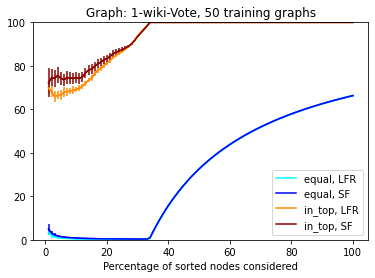

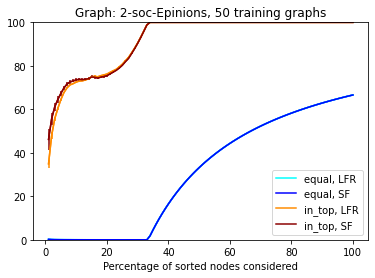

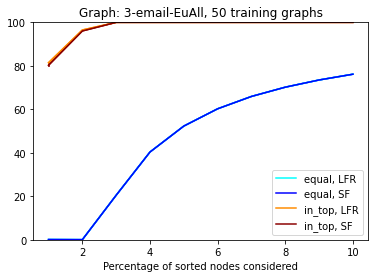

<Figure size 432x288 with 0 Axes>

In [9]:

graphs = ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']
for graph in graphs:
    metric = 'equal'
    gtype = 'LFR'
    color = 'cyan'
    seeds = range(15)
    phasepoint = 33

    xs = [j for j in M[graph][0][gtype][metric].keys()]
    ys = []
    err = []
    for j in xs:
        aux = []
        for seed in seeds:
            aux.append(M[graph][seed][gtype][metric][j])
        ys.append(np.mean(np.array(aux)))
        err.append(np.std(np.array(aux)))
    plt.errorbar(xs,ys,err,c=color)
    plt.plot(xs,ys, c=color, label = f"{metric}, {gtype}")

    metric = 'equal'
    gtype = 'SF'
    color = 'blue'
    seeds = range(15)
    phasepoint = 33

    xs = [j for j in M[graph][0][gtype][metric].keys()]
    ys = []
    err = []
    for j in xs:
        aux = []
        for seed in seeds:
            aux.append(M[graph][seed][gtype][metric][j])
        ys.append(np.mean(np.array(aux)))
        err.append(np.std(np.array(aux)))
    plt.errorbar(xs,ys,err,c=color)
    plt.plot(xs,ys, c=color, label = f"{metric}, {gtype}")


    metric = 'in_top'
    gtype = 'LFR'
    color = 'darkorange'
    seeds = range(15)
    phasepoint = 33

    xs = [j for j in M[graph][0][gtype][metric].keys()]
    ys = []
    err = []
    for j in xs:
        aux = []
        for seed in seeds:
            aux.append(M[graph][seed][gtype][metric][j])
        ys.append(np.mean(np.array(aux)))
        err.append(np.std(np.array(aux)))
    plt.errorbar(xs,ys,err,c=color)
    plt.plot(xs,ys, c=color, label = f"{metric}, {gtype}")

    metric = 'in_top'
    gtype = 'SF'
    color = 'darkred'
    seeds = range(15)
    phasepoint = 33

    xs = [j for j in M[graph][0][gtype][metric].keys()]
    ys = []
    err = []
    for j in xs:
        aux = []
        for seed in seeds:
            aux.append(M[graph][seed][gtype][metric][j])
        ys.append(np.mean(np.array(aux)))
        err.append(np.std(np.array(aux)))
    plt.errorbar(xs,ys,err,c=color)
    plt.plot(xs,ys, c=color, label = f"{metric}, {gtype}")

    plt.title(f'Graph: {graph}, 50 training graphs')
    plt.legend(loc=4)
    plt.ylim(0,100)
    plt.xlabel("Percentage of sorted nodes considered")
    plt.show()
    plt.clf()

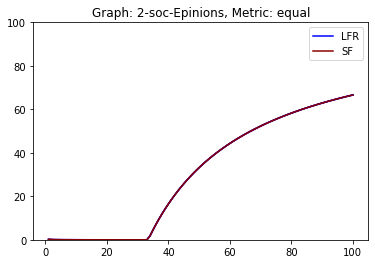

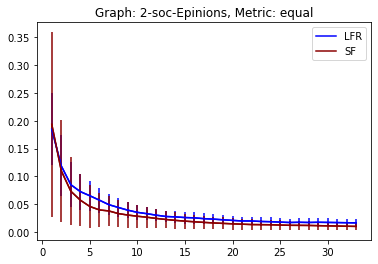

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import numpy as np

metric = 'equal'
seeds = range(15)
graphs = ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']
graph = graphs[1]
phasepoint = 33

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='blue')
plt.plot(xs,ys, c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='darkred')
plt.plot(xs,ys, c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend()
plt.ylim(0,100)
plt.show()
plt.clf()

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='blue')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='darkred')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend()

plt.show()
plt.clf()

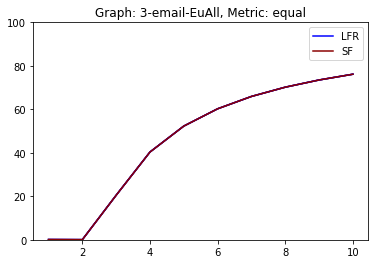

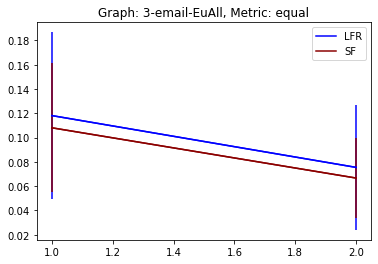

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import numpy as np

metric = 'equal'
seeds = range(15)
graphs = ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']
graph = graphs[2]
phasepoint = 2

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='blue')
plt.plot(xs,ys, c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='darkred')
plt.plot(xs,ys, c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend()
plt.ylim(0,100)
plt.show()
plt.clf()

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='blue')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='darkred')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend()

plt.show()
plt.clf()

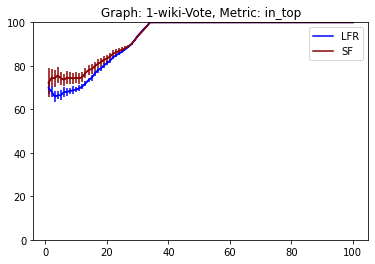

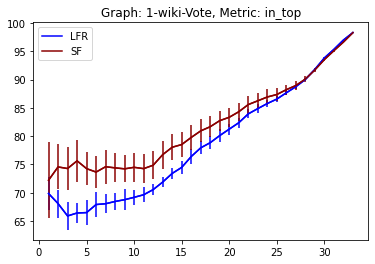

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import numpy as np

metric = 'in_top'
seeds = range(15)
graphs = ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']
graph = graphs[0]
phasepoint = 33

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='blue')
plt.plot(xs,ys, c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='darkred')
plt.plot(xs,ys, c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend()
plt.ylim(0,100)
plt.show()
plt.clf()

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='blue')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='darkred')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend()

plt.show()
plt.clf()

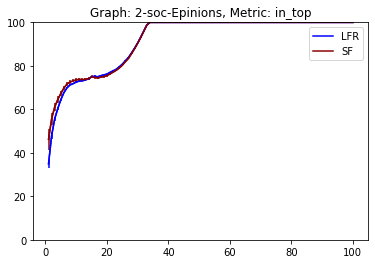

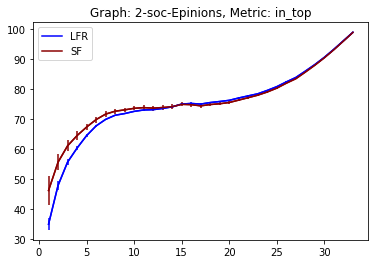

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import numpy as np

metric = 'in_top'
seeds = range(15)
graphs = ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']
graph = graphs[1]
phasepoint = 33

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='blue')
plt.plot(xs,ys, c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='darkred')
plt.plot(xs,ys, c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend()
plt.ylim(0,100)
plt.show()
plt.clf()

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='blue')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='darkred')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend()

plt.show()
plt.clf()

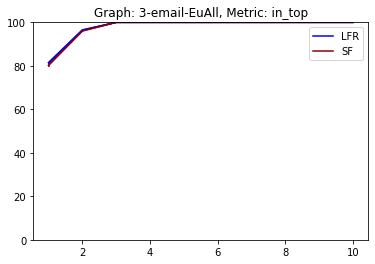

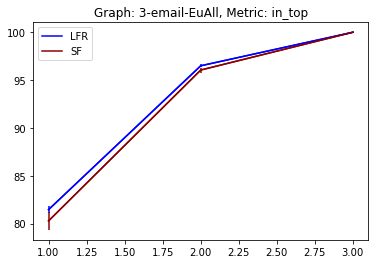

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
import numpy as np

metric = 'in_top'
seeds = range(15)
graphs = ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']
graph = graphs[2]
phasepoint = 3

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='blue')
plt.plot(xs,ys, c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='darkred')
plt.plot(xs,ys, c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend()
plt.ylim(0,100)
plt.show()
plt.clf()

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='blue')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='darkred')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend()

plt.show()
plt.clf()

LFR KT: 0.9079280318440567, 3.3306690738754696e-16
SF KT: 0.9242084412182172, 3.3306690738754696e-16


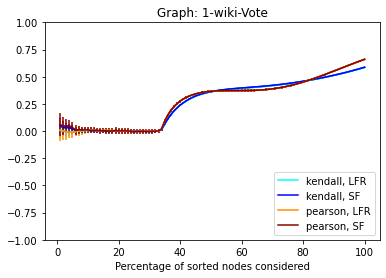

LFR KT: 0.8935799413963997, 1.1102230246251565e-16
SF KT: 0.8924751793015733, 3.3306690738754696e-16


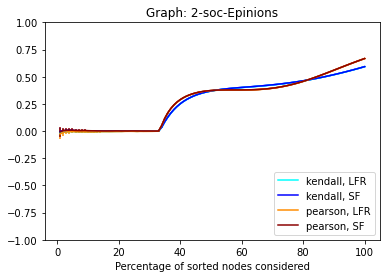

LFR KT: 0.9962811346892921, 2.220446049250313e-16
SF KT: 0.9959655991964863, 0.0


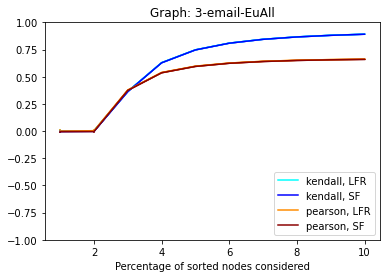

<Figure size 432x288 with 0 Axes>

In [15]:

graphs = ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']
for graph in graphs:

    aux = []
    for seed in seeds:
        aux.append(M[graph][0]['LFR']['fullkendall'][0])

    print(f"LFR KT: {np.mean(np.array(aux))}, {np.std(np.array(aux))}")

    aux = []
    for seed in seeds:
        aux.append(M[graph][0]['SF']['fullkendall'][0])

    print(f"SF KT: {np.mean(np.array(aux))}, {np.std(np.array(aux))}")

    metric = 'kendall'
    gtype = 'LFR'
    color = 'cyan'
    seeds = range(15)
    phasepoint = 33

    xs = [j for j in M[graph][0][gtype][metric].keys()]
    ys = []
    err = []
    for j in xs:
        aux = []
        for seed in seeds:
            aux.append(M[graph][seed][gtype][metric][j][0][0])
        ys.append(np.mean(np.array(aux)))
        err.append(np.std(np.array(aux)))
    plt.errorbar(xs,ys,err,c=color)
    plt.plot(xs,ys, c=color, label = f"{metric}, {gtype}")

    metric = 'kendall'
    gtype = 'SF'
    color = 'blue'
    seeds = range(15)
    phasepoint = 33

    xs = [j for j in M[graph][0][gtype][metric].keys()]
    ys = []
    err = []
    for j in xs:
        aux = []
        for seed in seeds:
            aux.append(M[graph][seed][gtype][metric][j][0][0])
        ys.append(np.mean(np.array(aux)))
        err.append(np.std(np.array(aux)))
    plt.errorbar(xs,ys,err,c=color)
    plt.plot(xs,ys, c=color, label = f"{metric}, {gtype}")


    metric = 'pearson'
    gtype = 'LFR'
    color = 'darkorange'
    seeds = range(15)
    phasepoint = 33

    xs = [j for j in M[graph][0][gtype][metric].keys()]
    ys = []
    err = []
    for j in xs:
        aux = []
        for seed in seeds:
            aux.append(M[graph][seed][gtype][metric][j][0][0])
        ys.append(np.mean(np.array(aux)))
        err.append(np.std(np.array(aux)))
    plt.errorbar(xs,ys,err,c=color)
    plt.plot(xs,ys, c=color, label = f"{metric}, {gtype}")

    metric = 'pearson'
    gtype = 'SF'
    color = 'darkred'
    seeds = range(15)
    phasepoint = 33

    xs = [j for j in M[graph][0][gtype][metric].keys()]
    ys = []
    err = []
    for j in xs:
        aux = []
        for seed in seeds:
            aux.append(M[graph][seed][gtype][metric][j][0][0])
        ys.append(np.mean(np.array(aux)))
        err.append(np.std(np.array(aux)))
    plt.errorbar(xs,ys,err,c=color)
    plt.plot(xs,ys, c=color, label = f"{metric}, {gtype}")

    plt.title(f'Graph: {graph}')
    plt.legend(loc=4)
    plt.ylim(-1,1)
    plt.xlabel("Percentage of sorted nodes considered")
    plt.show()
    plt.clf()

LFR KT: 0.9079280318440567, 3.3306690738754696e-16
SF KT: 0.9242084412182172, 3.3306690738754696e-16


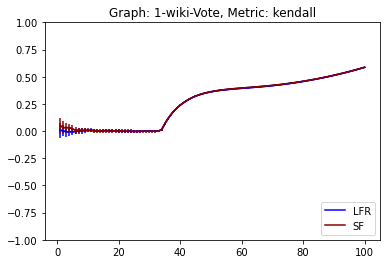

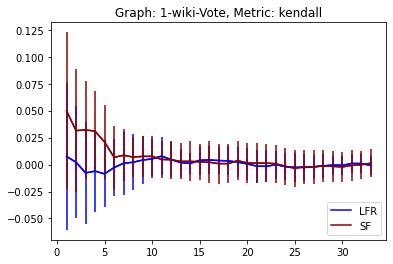

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import numpy as np

metric = 'kendall'
seeds = range(15)
graphs = ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']
graph = graphs[0]
phasepoint = 33


aux = []
for seed in seeds:
    aux.append(M[graph][0]['LFR']['fullkendall'][0])

print(f"LFR KT: {np.mean(np.array(aux))}, {np.std(np.array(aux))}")

aux = []
for seed in seeds:
    aux.append(M[graph][0]['SF']['fullkendall'][0])

print(f"SF KT: {np.mean(np.array(aux))}, {np.std(np.array(aux))}")

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='blue')
plt.plot(xs,ys, c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='darkred')
plt.plot(xs,ys, c='darkred', label = "SF")



plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend(loc=4)
plt.ylim(-1,1)
plt.show()
plt.clf()

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='blue')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='darkred')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend(loc=4)
plt.show()
plt.clf()

LFR KT: 0.8935799413963997, 1.1102230246251565e-16
SF KT: 0.8924751793015733, 3.3306690738754696e-16


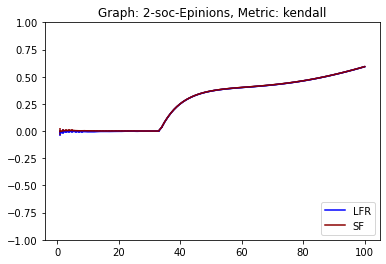

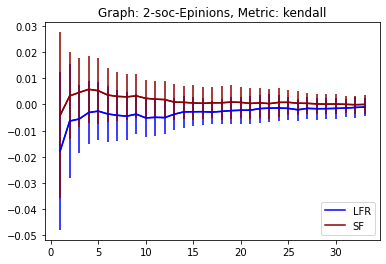

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
import numpy as np

metric = 'kendall'
seeds = range(15)
graphs = ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']
graph = graphs[1]
phasepoint = 33


aux = []
for seed in seeds:
    aux.append(M[graph][0]['LFR']['fullkendall'][0])

print(f"LFR KT: {np.mean(np.array(aux))}, {np.std(np.array(aux))}")

aux = []
for seed in seeds:
    aux.append(M[graph][0]['SF']['fullkendall'][0])

print(f"SF KT: {np.mean(np.array(aux))}, {np.std(np.array(aux))}")

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='blue')
plt.plot(xs,ys, c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='darkred')
plt.plot(xs,ys, c='darkred', label = "SF")



plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend(loc=4)
plt.ylim(-1,1)
plt.show()
plt.clf()

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='blue')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='darkred')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend(loc=4)
plt.show()
plt.clf()

LFR KT: 0.9962811346892921, 2.220446049250313e-16
SF KT: 0.9959655991964863, 0.0


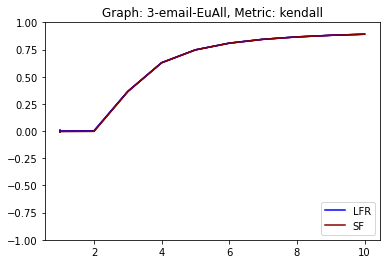

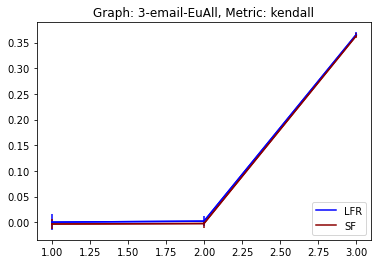

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
import numpy as np

metric = 'kendall'
seeds = range(15)
graphs = ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']
graph = graphs[2]
phasepoint = 3


aux = []
for seed in seeds:
    aux.append(M[graph][0]['LFR']['fullkendall'][0])

print(f"LFR KT: {np.mean(np.array(aux))}, {np.std(np.array(aux))}")

aux = []
for seed in seeds:
    aux.append(M[graph][0]['SF']['fullkendall'][0])

print(f"SF KT: {np.mean(np.array(aux))}, {np.std(np.array(aux))}")

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='blue')
plt.plot(xs,ys, c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs,ys,err,c='darkred')
plt.plot(xs,ys, c='darkred', label = "SF")



plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend(loc=4)
plt.ylim(-1,1)
plt.show()
plt.clf()

xs = [j for j in M[graph][0]['LFR'][metric].keys()]

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['LFR'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='blue')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='blue', label = "LFR")

ys = []
err = []
for j in xs:
    aux = []
    for seed in seeds:
        aux.append(M[graph][seed]['SF'][metric][j][0][0])
    ys.append(np.mean(np.array(aux)))
    err.append(np.std(np.array(aux)))
plt.errorbar(xs[:phasepoint],ys[:phasepoint],err[:phasepoint],c='darkred')
plt.plot(xs[:phasepoint],ys[:phasepoint], c='darkred', label = "SF")

plt.title(f'Graph: {graph}, Metric: {metric}')
plt.legend(loc=4)
plt.show()
plt.clf()

# Degree correlation?

In [79]:
with open(f"real_performance_full_50_generated_train_graphs_30_seeds.pickle",'rb') as f:
    data = pickle.load(f)

In [106]:
data.keys()

dict_keys(['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll'])

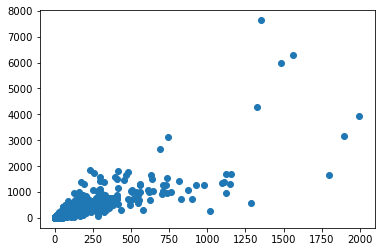

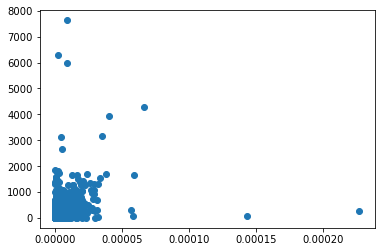

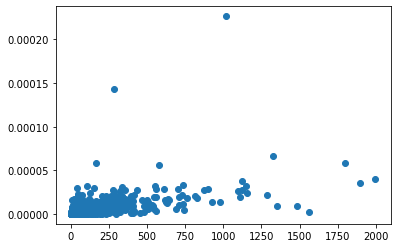

<Figure size 432x288 with 0 Axes>

In [ ]:
graphs = ['1-wiki-Vote', '2-soc-Epinions', '3-email-EuAll']
sizes = [10000,100000,300000]

for idx,g in graphs:

    graph = graphs[idx]
    size = sizes[idx]

    deg = data[graph]['LFR'][f'{size}_size']['1_copies']['pred']['4_epoch']['0_seed']['deg']
    pred = data[graph]['LFR'][f'{size}_size']['1_copies']['pred']['4_epoch']['0_seed']['pred']
    real = data[graph]['LFR'][f'{size}_size']['real']

    plt.scatter(pred,deg)
    plt.show()
    plt.clf()

    plt.scatter(real,deg)
    plt.show()
    plt.clf()

    plt.scatter(pred,real)
    plt.show()
    plt.clf()